<a href="https://colab.research.google.com/github/mrashutoshnigam/ai-ml-course/blob/main/Machine-Learning/Oreilly/Ch4_TrainingModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Models

In [2]:
!pip install pandas numpy scikit-learn matplotlib


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X= 2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

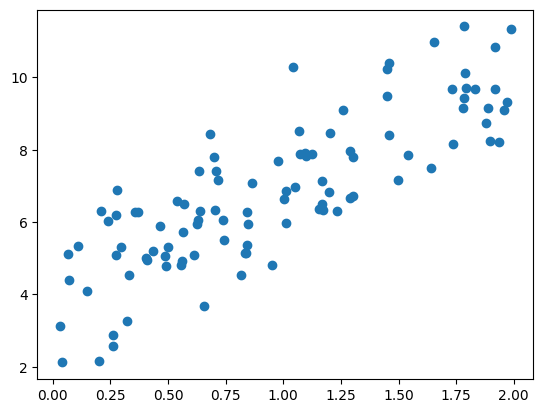

In [5]:
plt.scatter(X,y)
plt.show()

In [6]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[3.95263271],
       [3.02663273]])

In [8]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.95263271],
       [10.00589817]])

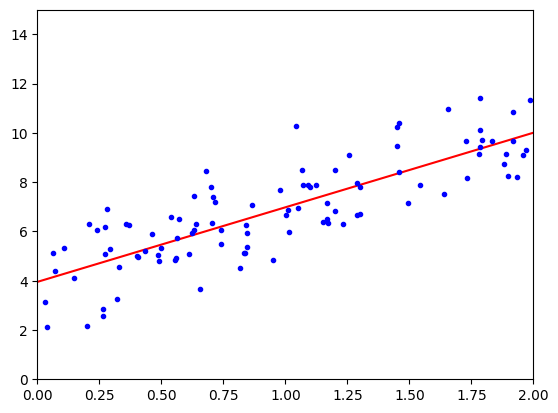

In [9]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.95263271]), array([[3.02663273]]))

In [11]:
lin_reg.predict(X_new)

array([[ 3.95263271],
       [10.00589817]])

In [12]:
theta_best_svd, residuals, rank ,s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[3.95263271],
       [3.02663273]])

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[3.95263271],
       [3.02663273]])

In [14]:
# 4.7 Gradent Descent Step

eta = 0.1
n_iterations = 1000
m= 100

theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [15]:
theta

array([[3.95263271],
       [3.02663273]])

In [25]:
# Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [18]:
theta

array([[3.97830229],
       [2.9746149 ]])

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.94645905]), array([3.01549506]))

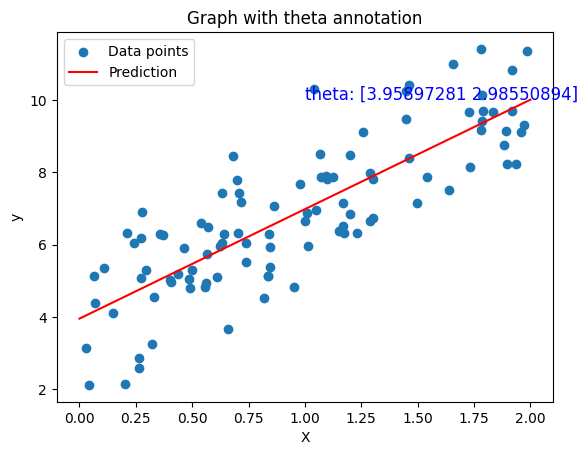

In [26]:
plt.scatter(X, y, label="Data points")
plt.plot(X_new, y_predict, "r-", label="Prediction")
plt.annotate(f"theta: {theta.flatten()}", xy=(1, 10), fontsize=12, color="blue")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Graph with theta annotation")
plt.show()

In [27]:
# 4.8 Polynomial Regression

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

array([-1.59880065,  2.55616352])

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.02816112]), array([[0.97212199, 0.50419727]]))